In [3]:
import zipfile
with zipfile.ZipFile('images.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from google.colab import drive


In [ ]:
# https://ithelp.ithome.com.tw/articles/10218801
# !cp /content/gdrive/***yourdata*** ./data
!cp -R ./drive/'My Drive'/'deep learning hw1 images.zip' ./  # <is this>
# !cp '/content/gdrive'./img2

In [ ]:
# !rm -rf images

In [ ]:
# !unzip file_location -d file_destination #-d is for quite option.
!unzip '/content/deep learning hw1 images.zip'

串流輸出內容已截斷至最後 5000 行。
  inflating: images/n02167151/n02167151_15357.JPEG  
  inflating: images/n02167151/n02167151_1540.JPEG  
  inflating: images/n02167151/n02167151_15421.JPEG  
  inflating: images/n02167151/n02167151_15446.JPEG  
  inflating: images/n02167151/n02167151_1545.JPEG  
  inflating: images/n02167151/n02167151_15459.JPEG  
  inflating: images/n02167151/n02167151_15503.JPEG  
  inflating: images/n02167151/n02167151_15506.JPEG  
  inflating: images/n02167151/n02167151_15507.JPEG  
  inflating: images/n02167151/n02167151_15547.JPEG  
  inflating: images/n02167151/n02167151_15558.JPEG  
  inflating: images/n02167151/n02167151_15578.JPEG  
  inflating: images/n02167151/n02167151_15605.JPEG  
  inflating: images/n02167151/n02167151_1564.JPEG  
  inflating: images/n02167151/n02167151_15641.JPEG  
  inflating: images/n02167151/n02167151_1567.JPEG  
  inflating: images/n02167151/n02167151_1576.JPEG  
  inflating: images/n02167151/n02167151_1579.JPEG  
  inflating: images/n02167151/n

In [ ]:
file = open('/content/test.txt', 'r')
imgf = [] ; labelf = []
for line in file.readlines():
  img, label = line.split()
  imgf.append(img); labelf.append(label)
file.close()

In [ ]:
'/content/'+'images/n02111889/n02111889_9736.JPEG'

'/content/images/n02111889/n02111889_9736.JPEG'

In [ ]:
def preprocess(filepath, imgf, labelf) :
  file = open(filepath, 'r')
  for line in file.readlines():
    img, label = line.split()
    imgf.append('/content/'+img); labelf.append(label)
  file.close()

In [ ]:
def cv2hog(imgl):
  histl = []
  winSize = (64,64)
  blockSize = (16,16)
  blockStride = (8,8)
  cellSize = (8,8)
  nbins = 9
  derivAperture = 1
  winSigma = 4.
  histogramNormType = 0
  L2HysThreshold = 2.0000000000000001e-01
  gammaCorrection = 0
  nlevels = 64
  for ig in imgl:
    image = cv2.imread(ig,0)
    # plt.imshow(image)
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
    hist = hog.compute(image, winStride=(8,8), padding=(8,8), locations=((10,20),))
    histl.append(hist)
  return(histl)

In [ ]:
# test_y = []
# test_imgs = []
train_y = []
train_imgs = []
val_y = []
val_imgs = []
# preprocess('/content/test.txt',test_imgs,test_y)
preprocess('/content/train.txt',train_imgs,train_y)
preprocess('/content/val.txt',val_imgs,val_y)

In [ ]:
#train_hog = np.array(cv2hog(train_imgs))
#val_hog = np.array(cv2hog(val_imgs))
print(np.shape(train_hog[0][:]))
print(np.shape(train_y))
print(np.shape(val_hog[0][:]))
print(np.shape(val_y))


(1764, 1)
(63325,)
(1764, 1)
(450,)


In [ ]:
np.save('train_hog.npy', train_hog)
np.save('train_y.npy',np.array(train_y))
np.save('val_hog.npy', val_hog)
np.save('val_y.npy',np.array(val_y))

In [ ]:
test_hog = cv2hog(test_imgs)

In [ ]:
test_hog = np.array(test_hog)

In [ ]:
np.shape(test_hog)

(450, 1764, 1)

In [ ]:
np.save('test_hog.npy', test_hog)
np.save('test_y.npy',np.array(test_y))

In [ ]:
print(np.shape(test_hog[0][:]))
print(np.shape(test_y))

(1764, 1)
(450,)


In [19]:
!unzip '/content/train_hog.zip'

Archive:  /content/train_hog.zip
replace train_hog.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_hog.npy           


In [21]:
test_hog = np.load('/content/test_hog.npy')
test_y = np.load('/content/test_y.npy')
train_hog = np.load('/content/train_hog.npy')
train_y = np.load('/content/train_y.npy')
val_hog = np.load('/content/val_hog.npy')
val_y = np.load('/content/val_y.npy')

In [23]:
print(np.shape(test_hog))
print(np.shape(test_y))
print(np.shape(train_hog))
print(np.shape(train_y))
print(np.shape(val_hog))
print(np.shape(val_y))

(450, 1764, 1)
(450,)
(63325, 1764, 1)
(63325,)
(450, 1764, 1)
(450,)


In [24]:
train_hog = train_hog.reshape((63325, 1764))
test_hog = test_hog.reshape((450, 1764))
val_hog = val_hog.reshape((450, 1764))

In [ ]:
import sklearn

In [ ]:
np.sqrt(1764)

42.0

In [ ]:
print(type(train_y))
print(type(train_hog))
train_y = np.array(train_y)
print(type(train_y))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
import sklearn

In [ ]:
print(train_hog[1])

[[0.10831746]
 [0.12597914]
 [0.13383391]
 ...
 [0.25205758]
 [0.25205758]
 [0.25205758]]


In [ ]:
np.shape(train_hog)

(63325, 1764)

In [ ]:
train_hog = train_hog.reshape((63325,1764))

In [26]:
rf_clf = RandomForestClassifier(n_estimators=42, criterion='entropy', min_samples_leaf=63 )
rf_clf.fit(train_hog, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=63, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=42,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [3]:
np.mean(rf_clf.predict(val_hog)==val_y)

NameError: name 'rf_clf' is not defined

In [29]:
from sklearn.model_selection import GridSearchCV

In [34]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ['entropy'],
    'bootstrap': [True],
    #'max_depth': [30, 50, 70],
    #'min_samples_leaf': [5, 10, 20],
    #'min_samples_split': [20, 40, 60],
    'n_estimators': [42, 200, 353]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 4)

In [35]:
grid_search.fit(train_hog, train_y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [28]:
1764*0.2

352.8

In [ ]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
import pickle
filename = 'rf_model.sav'
pickle.dump(rf_clf, filename)

In [ ]:
load_model = pickle.load(open(filename, "rb"))

In [ ]:
def plot_train_val_loss(loss_train, loss_val):
  epochs = range(1,35)
  plt.plot(epochs, loss_train, "#006F44", label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def plot_top1_top5_acc(top1_train,top1_val,top5_train,top5_val):
  epochs = range(1,35)
  plt.plot(epochs, top1_train, '#006F44', label='Top1 Accuracy (Train)')
  plt.plot(epochs, top1_val, '#0762C8', label='Top1 Accuracy (Validation)')
  plt.plot(epochs, top5_train, '#2CC84D', label='Top5 Accuracy (Train)')
  plt.plot(epochs, top5_val, '#56B7E6', label='Top5 Accuracy (Validation)')
  plt.title('Training and Validation Top1 Accuracy / Top5 Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

(34,)
(34,)


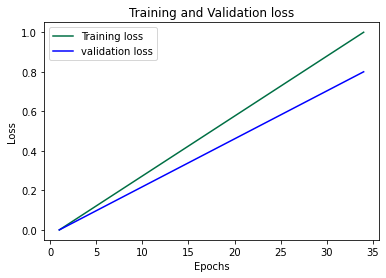

In [ ]:
loss_train = np.linspace(start=0, stop=1, num=34)
loss_val = np.linspace(start=0, stop=0.8, num=34)
print(np.shape(loss_train))
print(np.shape(loss_val))
plot_train_val_loss(loss_train, loss_val)

(34,)
(34,)


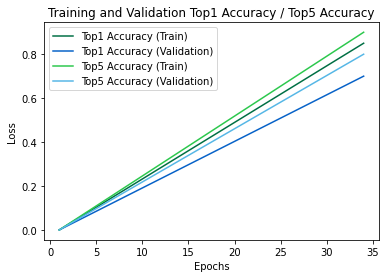

In [ ]:
top1_train = np.linspace(start=0, stop=0.85, num=34)
top1_val = np.linspace(start=0, stop=0.7, num=34)
top5_train = np.linspace(start=0, stop=0.9, num=34)
top5_val = np.linspace(start=0, stop=0.8, num=34)
print(np.shape(loss_train))
print(np.shape(loss_val))
plot_top1_top5_acc(top1_train, top1_val, top5_train, top5_val)

In [ ]:
def preprocess(filepath, imgf, labelf) :
  file = open(filepath, 'r')
  for line in file.readlines():
    img, label = line.split()
    imgf.append(img); labelf.append(label)
  file.close()

In [ ]:
y = []
imgs = []
preprocess('/content/img2/tes.txt',imgs,y)

In [ ]:
y

['0', '0', '0', '0', '0']

In [ ]:
imgs

['img2/a1/n02111277_19.JPEG',
 'img2/a1/n02111277_25.JPEG',
 'img2/a1/n02111277_32.JPEG',
 'img2/a1/n02111277_39.JPEG',
 'img2/a1/n02111277_48.JPEG']

In [ ]:
# https://stackoverflow.com/questions/28390614/opencv-hogdescripter-python
def cv2hog(imgl):
  histl = []
  winSize = (64,64)
  blockSize = (16,16)
  blockStride = (8,8)
  cellSize = (8,8)
  nbins = 9
  derivAperture = 1
  winSigma = 4.
  histogramNormType = 0
  L2HysThreshold = 2.0000000000000001e-01
  gammaCorrection = 0
  nlevels = 64
  for ig in imgl:
    image = cv2.imread(ig,0)
    # plt.imshow(image)
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
    hist = hog.compute(image, winStride=(8,8), padding=(8,8), locations=((10,20),))
    histl.append(hist)
  return(histl)

In [ ]:
cv2.imread('img2/a1/n02111277_19.JPEG')

array([[[196, 189, 156],
        [184, 177, 144],
        [147, 142, 111],
        ...,
        [ 93, 107,  96],
        [ 83,  97,  86],
        [ 82,  96,  85]],

       [[182, 175, 142],
        [183, 178, 145],
        [168, 163, 132],
        ...,
        [ 96, 109, 101],
        [ 85,  98,  90],
        [ 75,  88,  80]],

       [[185, 180, 149],
        [191, 188, 157],
        [192, 189, 158],
        ...,
        [ 85,  99,  93],
        [ 76,  90,  84],
        [ 65,  79,  73]],

       ...,

       [[168, 182, 148],
        [142, 156, 122],
        [132, 143, 110],
        ...,
        [139, 123, 110],
        [160, 147, 133],
        [174, 158, 145]],

       [[143, 160, 123],
        [151, 168, 131],
        [150, 164, 128],
        ...,
        [144, 128, 112],
        [151, 136, 120],
        [166, 150, 134]],

       [[148, 165, 128],
        [144, 161, 124],
        [146, 160, 124],
        ...,
        [136, 120, 104],
        [139, 123, 107],
        [165, 149, 133]]

In [ ]:
print(imgs)
hists = cv2hog(imgs)
np.shape(hists[0])

['img2/a1/n02111277_19.JPEG', 'img2/a1/n02111277_25.JPEG', 'img2/a1/n02111277_32.JPEG', 'img2/a1/n02111277_39.JPEG', 'img2/a1/n02111277_48.JPEG']


(1764, 1)

In [ ]:
np.save('tra_hog.npy', hists)

In [ ]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/common/layers.py
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/common/functions.py

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # yhat
        self.t = None # target y

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # overflow measures : looks like to reduce inf situations
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def softmax2(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

In [ ]:
x = np.random.normal(size=10)
print(x)
print(softmax(x))
print(softmax2(x))

[ 1.18306798  1.82109363  1.64577483 -0.74906252  0.97404695 -0.95554113
 -0.09205384 -0.12184826  1.42878427  1.0709846 ]
[0.12079858 0.22864035 0.19187256 0.01749638 0.09801333 0.01423232
 0.03375075 0.03276    0.15444544 0.10799028]
[0.12079858 0.22864035 0.19187256 0.01749638 0.09801333 0.01423232
 0.03375075 0.03276    0.15444544 0.10799028]


In [ ]:
x = np.array([1000000000000000000,-2,3,-4,5])
print(np.max(x, axis=-1, keepdims=True))
print(softmax(x))
print(softmax2(x))

[1000000000000000000]
[1. 0. 0. 0. 0.]
[nan  0.  0.  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
# https://github.com/PENGZhaoqing/Hog-feature/blob/master/hog.py
# https://github.com/karan6181/Softmax-Classifier/blob/master/softmaxClassifier.py
# https://github.com/Vercaca/Perceptron

# https://machinelearningmastery.com/softmax-activation-function-with-python/
# https://learnopencv.com/histogram-of-oriented-gradients/
# https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/
# https://openhome.cc/Gossip/CodeData/PythonTutorial/AssertDocTestPy3.html

# https://numpy.org/devdocs/user/quickstart.html

# read file
img = cv2.imread('/content/n02111277_19.JPEG', cv2.IMREAD_COLOR)
# plt.imshow(img, cmap=plt.cm.gray)
# print(img)
# np.shape(img)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# hog = Hog_descriptor(img, cell_size=8, bin_size=8)
# vector, image = hog.extract()
# plt.imshow(image, cmap=plt.cm.gray)
# plt.show()

# Perceptron (Plot ?)

# Activation Function : Softmax
# https://zh.wikipedia.org/wiki/Softmax%E5%87%BD%E6%95%B0
z = np.array([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0])
print(np.exp(z)/sum(np.exp(z)))

In [ ]:
# https://stackoverflow.com/questions/28390614/opencv-hogdescripter-python
# https://docs.opencv.org/4.5.1/d5/d33/structcv_1_1HOGDescriptor.html#a5c8e8ce0578512fe80493ed3ed88ca83


<HOGDescriptor 0x7f968645ef10>


'\n#compute(img[, winStride[, padding[, locations]]]) -> descriptors\nwinStride = (8,8)\npadding = (8,8)\nlocations = ((10,20),)\nhist2 = hog2.compute(image,winStride,padding,locations)\nnp.shape(hist2)\n'

In [ ]:
from google.colab import drive
import os
# drive.mount('/content/gdrive')
!cp '/content/gdrive/My Drive/img2/'<img2>
!ls

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `cp '/content/gdrive/My Drive/img2/'<img2>'
 gdrive		     sample_data    'train (1).txt'
 n02111277_19.JPEG  'test (1).txt'  'val (1).txt'


In [ ]:
from google.colab import files
!zip -r /content/imagesf.zip /content/imagesf
files.download("/content/imagesf.zip")

updating: content/imagesf/ (stored 0%)
updating: content/imagesf/a1/ (stored 0%)
updating: content/imagesf/a1/n02111277_25.JPEG (deflated 1%)
updating: content/imagesf/a1/n02111277_39.JPEG (deflated 1%)
updating: content/imagesf/a1/n02111277_19.JPEG (deflated 1%)
updating: content/imagesf/a1/n02111277_48.JPEG (deflated 1%)
updating: content/imagesf/a1/n02111277_32.JPEG (deflated 2%)
updating: content/imagesf/a2/ (stored 0%)
updating: content/imagesf/a2/n02111277_115.JPEG (deflated 1%)
updating: content/imagesf/a2/n02111277_101.JPEG (deflated 1%)
updating: content/imagesf/a2/n02111277_94.JPEG (deflated 1%)
updating: content/imagesf/a2/n02111277_104.JPEG (deflated 2%)
updating: content/imagesf/a2/n02111277_110.JPEG (deflated 2%)
updating: content/imagesf/tes.txt (deflated 68%)
updating: content/imagesf/tra.txt (deflated 74%)
  adding: content/imagesf/.ipynb_checkpoints/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# try perception

class Perceptron:
  def __init__(self, n_inputs, activ_func='Maxout', save_fig=True, batch_size=16, learning_rate=0.01, n_iters=1000):
      self.__weights = np.array([0.0] * (n_inputs + 1)) # 1 for bias

      # self.activation_func = self.activation
      self.n_iters = n_iters  # total epochs
      self.lr = learning_rate
      self.epoch = 1
  @property
  def train(self, X, y):


'''
def train(self, datasets):
        n_iteration = 0
        n_weights = len(self.__weights)
        if len(datasets.columns) != n_weights:
            raise Exception("Wrong inputs of training!")

        x_title, y_title = list(datasets.columns)[:2]
        # check_error_results
        result = self.check_error(datasets, n_iteration)

        while result:
            n_iteration += 1
            X, target = result
            self.update_weights(X, target)

            plot_data_and_line(datasets, W=self.weights, iter_time=n_iteration, x_title=x_title, y_title=y_title, save_fig=self.__save_fig)
            result = self.check_error(datasets, n_iteration)

def check_error(self, datasets, n_iteration):
        n_weights = len(self.__weights)
        error = 0
        result = False
        for i in range(datasets.shape[0]):
            row = datasets.iloc[i].tolist()
            X, target = np.array([1] + row[:-1]), row[-1]  # initial x[0] as 1, for bias, so that w0*x0 = w0 (aka. b)

            y = self.activation(np.dot(self.__weights, X)) # W*X = w0*x0 + w1*x1 + ... + w_n*x_n

            if target != y:
                error += 1
                result = X, target
        print('Iteration #{}: error = {}'.format(n_iteration, error))
        return result
'''
  def get_loss(self, y_hat, y):
    # multi-class cross-entropy
    loss += np.dot(y ,np.lop(y_hat))  #??
    
    print('Epoch #{}: loss = {}'.format(self.epoch, loss))
    return loss
  
  def top_accuracy(self, y_hat, y):
    batch_n = y.shape[0] #??
    top1 = np.sum(np.equal(np.array([1,2,3,4,5]),np.array([1,3,5,7,9]))) ##
    top5 = np.sum(np.isin(element,np.sort(np.argpartition(arr, len(arr) - k)[-k:]))) ##

    return top1, top5

  def train(self, X, y):
    n_weights = len(self.__weights)

    if len(X.columns) != n_weights:
      raise Exception("Wrong inputs of training!")

    n_weights = len(self.__weights)
    loss = 0
    for i in range(X.shape[0]):
      data = np.array([1] + X.iloc[i].tolist())
      y_hat = activation(np.dot(self.__weigths, X))
    loss = get_loss(y_hat, y)
    top1_acc, top5_acc = top_accuracy(y_hat, y)

  def weights(self):
      return self._weights[:]
  
  def update_weights(self, X:list, y:int):
    self.lr
  
  def activation(self, wx): # maxout
      y_hat = lambda wx: np.exp(wx)/sum(np.exp(wx))
      return y_hat = lambda y: np.exp(y)/sum(np.exp(y))

# .npy


In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../../ml')

from utils import plot_data_and_line
from activation.activation import ActivationFunction
from preprocess.iris_preprocess import iris_data_preprocess

class Perceptron:
    def __init__(self, n_inputs, activ_func='Sign', save_fig=False):
        self.__weights = np.array([0.0] * (n_inputs + 1)) # 1 more for bias
        self.__save_fig = save_fig
        self.__activation = ActivationFunction(activ_func)

    @property
    def weights(self):
        return self.__weights[:]

    def update_weights(self, X:list, y:int):
        print('>> Updating')

        self.__weights += X*y   # w += delta_w --> y * X
        print('after update: {}'.format(self.__weights))

    def activation(self, y): # sign
        return self.__activation.func(y)
        # if y > 0:
        #     return 1
        # else:
        #     return -1

    def check_error(self, datasets, n_iteration):
        n_weights = len(self.__weights)
        error = 0
        result = False
        for i in range(datasets.shape[0]):
            row = datasets.iloc[i].tolist()
            X, target = np.array([1] + row[:-1]), row[-1]  # initial x[0] as 1, for bias, so that w0*x0 = w0 (aka. b)

            y = self.activation(np.dot(self.__weights, X)) # W*X = w0*x0 + w1*x1 + ... + w_n*x_n

            if target != y:
                error += 1
                result = X, target
        print('Iteration #{}: error = {}'.format(n_iteration, error))
        return result

    def train(self, datasets):
        n_iteration = 0
        n_weights = len(self.__weights)
        if len(datasets.columns) != n_weights:
            raise Exception("Wrong inputs of training!")

        x_title, y_title = list(datasets.columns)[:2]
        # check_error_results
        result = self.check_error(datasets, n_iteration)

        while result:
            n_iteration += 1
            X, target = result
            self.update_weights(X, target)

            plot_data_and_line(datasets, W=self.weights, iter_time=n_iteration, x_title=x_title, y_title=y_title, save_fig=self.__save_fig)
            result = self.check_error(datasets, n_iteration)


def main():
    # read data and preprocessing
    iris_data = iris_data_preprocess()

    # build model
    myPerceptron = Perceptron(n_inputs=len(iris_data.columns)-1, save_fig=False)
    myPerceptron.train(iris_data)

    # plot the result
    x_title, y_title = list(iris_data.columns)[:2]
    plot_data_and_line(iris_data, myPerceptron.weights, x_title=x_title, y_title=y_title, save_fig=False)

if __name__ == '__main__':
    main()